# Базовый уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 1.1

Загрузите первый лист (`curr`) из файла `data.xlsx` в `pd.DataFrame` (в этой таблице приведены курсы доллара (USD) и евро (EUR) в рублях).

In [2]:
import pandas as pd

df = pd.read_excel('data.xlsx', sheetname = 'curr')

In [3]:
df

,Date,USD,EUR
0,2013-06-22,32.7433,43.3489
1,2013-06-25,32.9097,43.1018
2,2013-06-26,32.7140,42.9698
3,2013-06-27,32.8876,42.9841
4,2013-06-28,32.8766,42.8349
5,2013-06-29,32.7090,42.7180
6,2013-07-02,32.8517,42.8025
7,2013-07-03,32.9475,43.0525
8,2013-07-04,33.2204,43.0736
9,2013-07-05,33.1605,43.0954


## Задание 1.2

Выведите на экран тип поля `Date`. Если это `datetime64[ns]` или `<M8[ns]` (по сути то же самое), то мы имеем дело с правильным форматом даты. Если нет, приведите этот столбец к типу `datetime`.

In [4]:
type(df.Date.iloc[0])

pandas.tslib.Timestamp

In [5]:
df.dtypes

Date    datetime64[ns]
USD            float64
EUR            float64
dtype: object

## Задание 1.3

Выведите на экран минимальную и максимальную дату. Сколько всего дней содержится в наших данных? (*Hint: даты можно вычитать друг из друга*)

In [6]:
# минимальная
df.Date.min()

Timestamp('2013-06-22 00:00:00')

In [7]:
# максимальная
df.Date.max()

Timestamp('2017-06-21 00:00:00')

In [8]:
df.Date.max() - df.Date.min()

Timedelta('1460 days 00:00:00')

In [9]:
# но записей в файле у нас всего 988
df.Date.count()

988

## Задание 1.4

Постройте на одном графике курс доллара и курс евро.

In [10]:
# Заклинание, нужное для отрисовки графиков непосредственно в ноутбуке (подробнее в лекции 7)
%matplotlib inline
# Настройка стиля и размера графиков (возьмам стиль как на лекции)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.pyplot.style.use('ggplot')

In [11]:
# дату назначим индексом, чтобы график строился исходя из даты
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

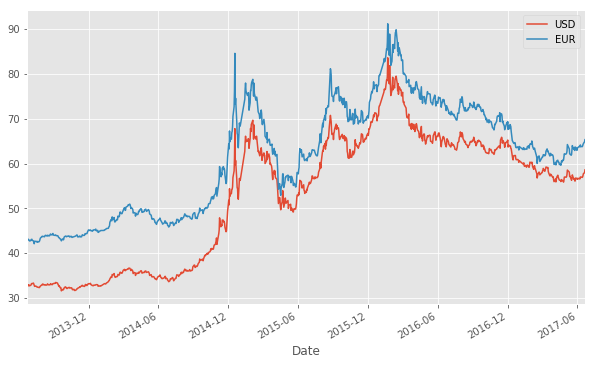

In [12]:
df.plot()

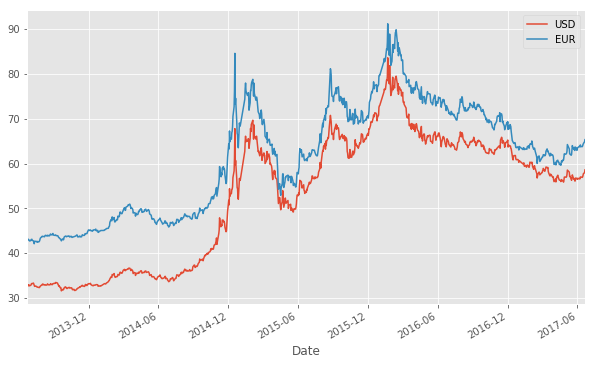

In [13]:
# или так
df[['USD', 'EUR']].plot()

## Задание 1.5

Найдите среднее значение курса евро в мае 2017 года.

In [14]:
# если Date уже индекс, то так
print 'EUR среднее в мае 2017\t', df.loc[(df.index > '2017-04-30')&(df.index < '2017-06-01'), 'EUR'].mean()

EUR среднее в мае 2017	62.9552736842


In [15]:
# иначе нужно написать:
print 'EUR среднее в мае 2017\t', df.loc[(df.Date > '2017-04-30')&(df.Date < '2017-06-01'), 'EUR'].mean()

EUR среднее в мае 2017	

AttributeError: 'DataFrame' object has no attribute 'Date'

# Продвинутый уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 2.1

Найдите долю дней, когда доллар растет.

In [16]:
prev = df.USD.iloc[0]
count = 0.
for elem in df.USD:
    if elem > prev:
        count += 1
    prev = elem
    
print count/df.USD.count()

0.526315789474


In [17]:
# или так
my_list = [df.USD.iloc[i] for i in xrange(1,df.USD.count()) if df.USD.iloc[i]>df.USD.iloc[i-1]]

df.USD.apply(lambda x: x in my_list).mean()

0.52631578947368418

## Задание 2.2

Постройте гистограмму доходности доллара.

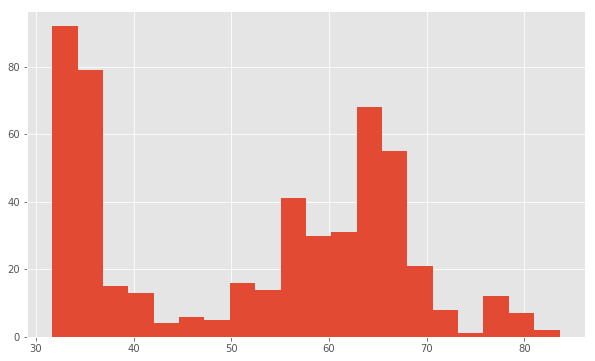

In [18]:
# Не понимаю, что такое доходность..разница среднего EUR за весь период и текущего значений?!
# возьмем список из предыдущего задания и посторим гистограмму
df.loc[df.USD.apply(lambda x: x in my_list), 'USD'].hist(bins=20)

## Задание 2.3

Добавьте в таблицу новую колонку `Weekday` – день недели на русском языке, т.е. строку со значением `u'понедельник'`, `u'вторник'` и т.д. (*Hint: удобно воспользоваться атрибутом* `.dt`)

In [19]:
# напишем функцию, которая по коду 0-6 вернет нам название дня недели в Unicode на русском
def week_day_uni(weekday):
    if weekday == 0:
        return u'понедельник'
    elif weekday == 1:
        return u'вторник'
    elif weekday == 2:
        return u'среда'
    elif weekday == 3:
        return u'четверг'
    elif weekday == 4:
        return u'пятница'
    elif weekday == 5:
        return u'суббота'
    else:
        return u'воскресенье'

In [20]:
# создадим столбец Weekday и заполним его (функцию выше для серии нашего DateFrame, воспользуемся атрибутом dt)
df['Weekday'] = df.index.to_series().dt.weekday.apply(week_day_uni)

In [21]:
df

,USD,EUR,Weekday
Date,,,
2013-06-22,32.7433,43.3489,суббота
2013-06-25,32.9097,43.1018,вторник
2013-06-26,32.7140,42.9698,среда
2013-06-27,32.8876,42.9841,четверг
2013-06-28,32.8766,42.8349,пятница
2013-06-29,32.7090,42.7180,суббота
2013-07-02,32.8517,42.8025,вторник
2013-07-03,32.9475,43.0525,среда
2013-07-04,33.2204,43.0736,четверг


## Задание 2.4

Рассчитайте корреляцию между курсами доллара и евро за весь доступный период (*Hint: в pandas уже встроена функция для расчета корреляций*).

In [22]:
df.USD.corr(df.EUR)

0.98230892515582846

In [25]:
df[['USD','EUR']].corrwith(df.EUR)

USD    0.982309
EUR    1.000000
dtype: float64

## Задание 2.5

Несколько лет назад курс евро отличался от курса доллара значительно сильнее, чем сейчас. Чтобы это визуализировать, вычислите курс евро к доллару (т.е. "сколько долларов стоит один евро") за каждый день. Постройте график курса евро к доллару за весь доступный период.

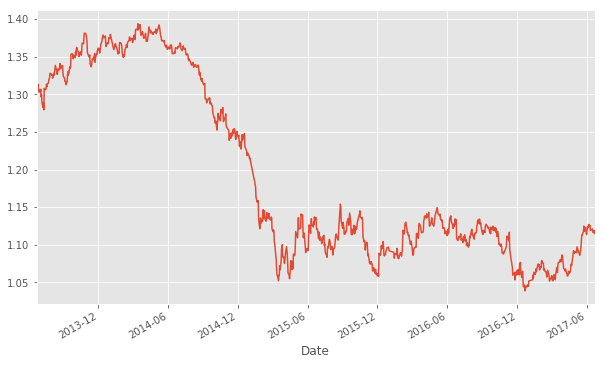

In [26]:
df.apply(lambda x: x['EUR']/x['USD'], axis=1).plot()

# Сложный уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 3.1

Загрузите второй лист (`oil`) из файла `data.xlsx` в `pd.DataFrame` (в этой таблице приведены цены за баррель нефти Brent в долларах США).

In [32]:
df_3 = pd.read_excel('data.xlsx', sheetname = 'oil')

In [33]:
df_3

,dt,Brent
0,2013-01-02,112.98
1,2013-01-03,113.03
2,2013-01-04,112.58
3,2013-01-07,112.49
4,2013-01-08,113.03
5,2013-01-09,113.07
6,2013-01-10,112.97
7,2013-01-11,110.30
8,2013-01-14,111.32
9,2013-01-15,111.72


## Задание 3.2

Объедините обе таблицы в одну. Итоговая таблица должна содержать дату в качестве индекса, а также поля `USD` (доллар), `EUR` (евро) и `Brent` (нефть). Обратите внимание, что периоды, за которые доступны данные, немного отличаются для курсов валют и для нефти. Нас интересует только тот период, когда и те, и другие данные присутствуют.

In [34]:
# зададим дату как индекс
df_3.set_index('dt', inplace=True)
df_3.sort_index(inplace=True)

In [35]:
df_3

,Brent
dt,
2013-01-02,112.98
2013-01-03,113.03
2013-01-04,112.58
2013-01-07,112.49
2013-01-08,113.03
2013-01-09,113.07
2013-01-10,112.97
2013-01-11,110.30
2013-01-14,111.32


In [36]:
df = pd.merge(df,df_3,left_index=True,right_index=True,how='inner')

In [37]:
df

,USD,EUR,Weekday,Brent
2013-06-25,32.9097,43.1018,вторник,101.51
2013-06-26,32.7140,42.9698,среда,100.62
2013-06-27,32.8876,42.9841,четверг,102.74
2013-06-28,32.8766,42.8349,пятница,102.49
2013-07-02,32.8517,42.8025,вторник,103.96
2013-07-03,32.9475,43.0525,среда,106.12
2013-07-05,33.1605,43.0954,пятница,107.46
2013-07-09,33.3210,42.7342,вторник,107.90
2013-07-10,33.0842,42.6389,среда,108.43
2013-07-11,32.9112,42.1033,четверг,108.18


In [38]:
df.count()

USD        772
EUR        772
Weekday    772
Brent      772
dtype: int64

In [39]:
df.drop('Weekday', axis=1)

,USD,EUR,Brent
2013-06-25,32.9097,43.1018,101.51
2013-06-26,32.7140,42.9698,100.62
2013-06-27,32.8876,42.9841,102.74
2013-06-28,32.8766,42.8349,102.49
2013-07-02,32.8517,42.8025,103.96
2013-07-03,32.9475,43.0525,106.12
2013-07-05,33.1605,43.0954,107.46
2013-07-09,33.3210,42.7342,107.90
2013-07-10,33.0842,42.6389,108.43
2013-07-11,32.9112,42.1033,108.18


## Задание 3.3

- Постройте на одном графике курсы валют и цены не нефть. Поскольку цена на нефть имеет немного другой масштаб, используйте параметр `secondary_y='Brent'` для отображения дополнительной оси $y$ справа.
- Посчитайте попарные корреляции всех трех временных рядов за весь период.

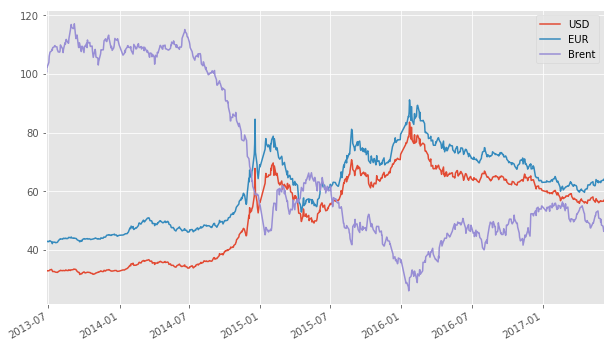

In [48]:
df[['USD', 'EUR', 'Brent']].plot()

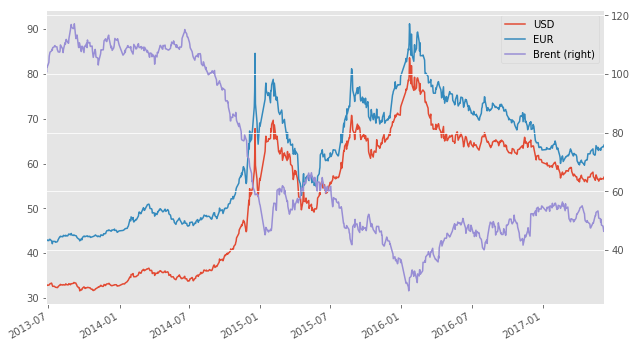

In [47]:
df[['USD', 'EUR', 'Brent']].plot(secondary_y='Brent')

In [49]:
df.corr()

,USD,EUR,Brent
USD,1.000000,0.982142,-0.978950
EUR,0.982142,1.000000,-0.938919
Brent,-0.978950,-0.938919,1.000000


## Задание 3.4

Определите, в какие дни недели лучше покупать евро, а в какие – продавать. Для этого рассчитайте среднюю доходность евро в разные дни недели (т.е. нужно сгруппировать таблицу по дням недели и рассчитать среднее процентное изменение курса евро в каждой группе).

In [40]:
# создадим столбец Weekday и заполним его (функцию выше для серии нашего DateFrame, воспользуемся атрибутом dt)
df['Weekday'] = df.index.to_series().dt.weekday.apply(week_day_uni)

In [41]:
df

,USD,EUR,Weekday,Brent
2013-06-25,32.9097,43.1018,вторник,101.51
2013-06-26,32.7140,42.9698,среда,100.62
2013-06-27,32.8876,42.9841,четверг,102.74
2013-06-28,32.8766,42.8349,пятница,102.49
2013-07-02,32.8517,42.8025,вторник,103.96
2013-07-03,32.9475,43.0525,среда,106.12
2013-07-05,33.1605,43.0954,пятница,107.46
2013-07-09,33.3210,42.7342,вторник,107.90
2013-07-10,33.0842,42.6389,среда,108.43
2013-07-11,32.9112,42.1033,четверг,108.18


In [42]:
# среднее значение EUR в дни недели
df.groupby('Weekday').EUR.mean()

Weekday
вторник    61.049935
пятница    61.255419
среда      61.306342
четверг    61.585947
Name: EUR, dtype: float64

In [45]:
# доходность снова..возьмем разницу значения среднего для EUR за весь период и текущего
# и умножим на 100, чтобы получить процент для каждой группы
# получается выгодно покупать по четвергам, а не выгодно - во вторник
(df.groupby('Weekday').EUR.mean() - df.EUR.mean())*100

Weekday
вторник   -25.159421
пятница    -4.611091
среда       0.481268
четверг    28.441700
Name: EUR, dtype: float64

## Задание 3.5

Постройте график "скользящей корреляции" между курсами доллара и евро (таким образом можно найти периоды, когда курсы коррелировали слабее обычного и использовать это для арбитража). Для этого нужно взять скользящее окно (например, 60 последних значений) и рассчитать корреляцию USD - EUR внутри каждого такого окна.